<a href="https://colab.research.google.com/github/vvv-knyazeva/EDUCATIONAL-WORKS/blob/main/08_04_task_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фаза 2 • Неделя 8 • Четверг
## Нейронные сети
### 🔥 PyTorch: fine tuning

### Подготовка к работе

1. Загрузи этот ноутбук на Google Colab
2. Авторизируйся на kaggle и выполни все шаги [инструкции](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)
3. Загрузи датасет по ссылкам ниже

Если не получается авторизироваться или скачать датасет: 
1. Скачай его локально и загрузи на свой Google Drive
2. Подключи свой Google Drive в Google Colab по [инструкции](https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
3. Перемести файлы в локальное хранилище Colab
4. Разархивировать файлы можно командой `!unzip filename.zip`


Некоторые датасеты можно скачать напрямую с помощью команды `wget`

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Данные

### Датасет: __коты__ и __собаки__

**Ссылка**: [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats)

**Загрузка**: 
    
`
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \ 
cats_and_dogs_filtered.zip
`
Если отсутствует `wget` или ОС Windows, то датасет можно скачать по ссылке: [link](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip)






In [ ]:
!wget -O cats_and_dogs_filtered.zip https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2023-05-25 17:28:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.0MB/s    in 2.3s    

2023-05-25 17:28:31 (29.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

2. Убедитесь, что структура папок соответствует задаче классификации (либо приведите ее к формату, указанному ниже): 

        `train`
        
            - class_1
            - class_2
            - ...
            - class_n
            
        `valid`

            - class_1
            - class_2
            - ...
            - class_n

In [ ]:
import os

dataset_path = 'cats_and_dogs_filtered'

train_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'validation')

classes = os.listdir(train_dir)

print('Number of classes:', len(classes))

for cls in classes:
    cls_train_path = os.path.join(train_dir, cls)
    cls_validation_path = os.path.join(validation_dir, cls)
    
    print('Class:', cls)
    print('Number of training samples:', len(os.listdir(cls_train_path)))
    print('Number of validation samples:', len(os.listdir(cls_validation_path)))

Number of classes: 2
Class: dogs
Number of training samples: 1000
Number of validation samples: 500
Class: cats
Number of training samples: 1000
Number of validation samples: 500


In [ ]:
!pip install torchutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


1. Создайте `DataLoader` в для обучающей и валидационных выборок. Примените аугментации к изображениям. 

In [ ]:
trnsfrms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [ ]:
import torchvision
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train/', 
                                                 transform=trnsfrms)
valid_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation/', 
                                                 transform=trnsfrms)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

На картинке ниже изображена сеть Inception v1. Для чего в её архитектуре присутствуют сразу 3 выхода? Как происходит инференс (предсказание) с помощью этой сети? 

![](https://miro.medium.com/max/1400/1*uW81y16b-ptBDV8SIT1beQ.png)

> В архитектуре сети Inception v1 присутствуют три выхода для того, чтобы использовать различные уровни абстракции при обработке изображений. Каждый выход предназначен для извлечения определенных признаков из изображения на разных уровнях абстракции. Это позволяет сети лучше распознавать объекты на изображении и повышает её точность.

> Для инференса (предсказания) с помощью этой сети необходимо подать изображение на вход сети и получить выходные данные из каждого выхода. Затем эти данные объединяются и проходят через полносвязный слой, который выдаёт окончательный результат классификации.

4. Создайте экземпляр предобученной модели: [torchvision models](https://pytorch.org/vision/stable/models.html)

In [ ]:
import torch
import torchvision.models as models

# Создание экземпляра модели ResNet-18
model = models.resnet50(pretrained=True)

# Перевод модели в режим eval (оценки)
model.eval()

# Пример использования модели для классификации изображения
input_image = torch.randn(1, 3, 224, 224) # Создание случайного изображения
output = model(input_image) # Получение выходных данных из модели

5. Дополните модель выходым слоем формата, который подходит под задачу: бинарная или многоклассовая классификация. 

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch.nn as nn

# Добавление выходного слоя для бинарной классификации
model.fc = nn.Linear(2048, 1)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

6. Обучите модель (только последний слой!) и зафиксируйте метрику на валидационной части выборки. 

In [ ]:
# замораживаем все веса в модели
for param in model.parameters():
    param.requires_grad = False

model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.BCEWithLogitsLoss()

In [ ]:
def compute_batch_accuracy(preds, labels):
    preds_reshaped = preds.squeeze(-1)
    # print(preds_reshaped)
    preds_sigmoid  = preds_reshaped.sigmoid()
    # print(preds_sigmoid)
    preds_classes  = torch.round(preds_sigmoid)
    # print(preds_classes)
    bool_array     = preds_classes == labels
    # print(bool_array)
    number_of_true = bool_array.sum()
    # print(number_of_true)
    accuracy       = number_of_true / len(labels)
    # print(accuracy)
    accuracy_float = accuracy.item()

    return accuracy_float

In [ ]:
def fit(model: torch.nn.Module, n_epochs: int = 30):
    model.to(device)

    train_epoch_acc = []
    train_epoch_losses = []
    valid_epoch_losses = []
    valid_epoch_acc =[]
    for epoch in range(n_epochs):
        model.train()
        loss_batch = []
        acc_batch  = []



        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            preds = model(images)

            loss = criterion(preds.squeeze(-1), labels.float())

            loss_batch.append(loss.item())
            acc_batch.append(compute_batch_accuracy(preds, labels))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_epoch_losses.append(np.mean(loss_batch))
        train_epoch_acc.append(np.mean(acc_batch))

        model.eval()
        loss_batch = []
        acc_batch  = []
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            preds = model(images)

            loss_batch.append(loss.item())
            acc_batch.append(compute_batch_accuracy(preds, labels))


        valid_epoch_losses.append(np.mean(loss_batch))
        valid_epoch_acc.append(np.mean(acc_batch))
        print(f'[Epoch {epoch:02d}] Train loss: {train_epoch_losses[-1]:.4f}, valid loss = {valid_epoch_losses[-1]:.4f} Train acc {train_epoch_acc[-1]:.4f} Valid acc {valid_epoch_acc[-1]:.4f}')

    fig, ax = plt.subplots(1, 2, figsize=(20, 4))
    ax[0].plot(train_epoch_losses)
    ax[0].plot(valid_epoch_losses)
    ax[0].set_ylim((0, np.max(train_epoch_losses.extend(valid_epoch_losses))))
    ax[0].set_title('Valid loss history')

    ax[1].plot(train_epoch_acc)
    ax[1].plot(valid_epoch_acc)
    ax[1].set_ylim(0, 1.1)
    ax[1].set_title('Acc history');
    return train_epoch_acc, train_epoch_losses, valid_epoch_losses, valid_epoch_acc

[Epoch 00] Train loss: 0.2302, valid loss = 0.0717 Train acc 0.8943 Valid acc 0.9844
[Epoch 01] Train loss: 0.0943, valid loss = 0.1645 Train acc 0.9668 Valid acc 0.9902
[Epoch 02] Train loss: 0.0605, valid loss = 0.0395 Train acc 0.9782 Valid acc 0.9893
[Epoch 03] Train loss: 0.0554, valid loss = 0.0872 Train acc 0.9792 Valid acc 0.9883
[Epoch 04] Train loss: 0.0682, valid loss = 0.0086 Train acc 0.9732 Valid acc 0.9805
[Epoch 05] Train loss: 0.0675, valid loss = 0.0605 Train acc 0.9747 Valid acc 0.9883
[Epoch 06] Train loss: 0.0988, valid loss = 0.0276 Train acc 0.9643 Valid acc 0.9883
[Epoch 07] Train loss: 0.0473, valid loss = 0.5228 Train acc 0.9807 Valid acc 0.9922
[Epoch 08] Train loss: 0.0586, valid loss = 0.0997 Train acc 0.9782 Valid acc 0.9873
[Epoch 09] Train loss: 0.0380, valid loss = 0.1725 Train acc 0.9856 Valid acc 0.9873


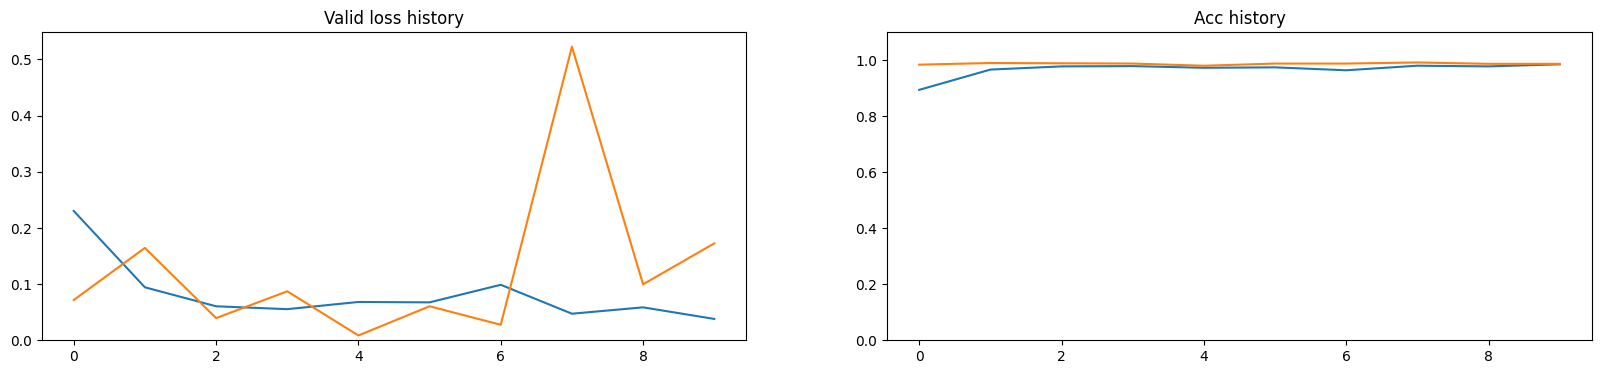

In [ ]:
train_epoch_acc, train_epoch_losses, valid_epoch_losses, valid_epoch_acc = fit(model, 10)

7. Распечатайте изображение из тестовой выборки и подпишите класс картинки, предсказанный моделью. 

In [ ]:
import torchvision.transforms as transforms

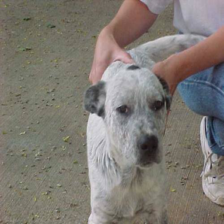

Predicted Class: Пёсель
True Class: Пёсель


In [ ]:
# Выбираем случайное изображение из тестовой выборки
image, label = next(iter(valid_loader))
image = image[0]  # Извлекаем единственное изображение из батча
label = label[0]  # Извлекаем соответствующий класс

# Прогнозирование класса изображения
with torch.no_grad():
    output = model(image.unsqueeze(0).cuda())  # Добавляем размерность батча и указываем использование
    predicted = torch.round(torch.sigmoid(output))

# Подписываем класс картинки
class_names = ["Котик", "Пёсель"]  # Замените на свои классы
predicted_class = class_names[int(predicted.item())]
true_class = class_names[int(label.item())]

# Отображение изображения и его подписи
image = transforms.ToPILImage()(image.cuda())  # Указываем использование cudo
image.show()
print(f"Predicted Class: {predicted_class}")
print(f"True Class: {true_class}")

In [ ]:
!wget -O image2.jpg https://avatars.mds.yandex.net/get-altay/4042551/2a00000180b2f36ba9c9ea012ee8005bec4e/XXL_height

--2023-05-25 17:37:26--  https://avatars.mds.yandex.net/get-altay/4042551/2a00000180b2f36ba9c9ea012ee8005bec4e/XXL_height
Resolving avatars.mds.yandex.net (avatars.mds.yandex.net)... 87.250.247.182, 87.250.247.183, 87.250.247.184, ...
Connecting to avatars.mds.yandex.net (avatars.mds.yandex.net)|87.250.247.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114644 (112K) [image/jpeg]
Saving to: ‘image2.jpg’

image2.jpg          100%[===================>] 111.96K  --.-KB/s    in 0.1s    

2023-05-25 17:37:26 (873 KB/s) - ‘image2.jpg’ saved [114644/114644]



In [ ]:
resize = T.Resize((224, 224))

In [ ]:
img = resize(io.read_image('image2.jpg')/255)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
img.shape

torch.Size([3, 224, 224])

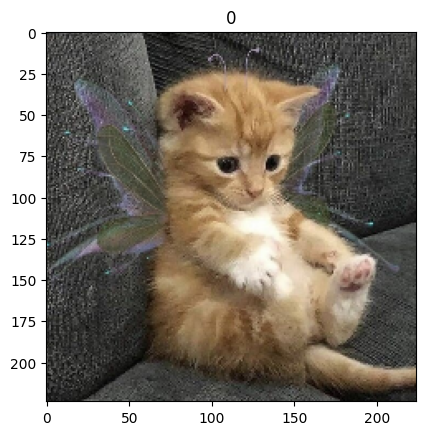

In [ ]:
model.to(device)
model.eval()
plt.imshow(torch.permute(img, (1, 2, 0)))
plt.title(model(img.to(device).unsqueeze(0)).argmax().item());

8. "Разморозьте" несоклько слоев базовой модели и вновь обучите ее. Зафиксируйте метрику качества для модели. О том, как сделать unfreeze нескольких слоев сразу, а не только последнего, можно почитать тут: [discuss.pytorch.org](https://discuss.pytorch.org/t/how-the-pytorch-freeze-network-in-some-layers-only-the-rest-of-the-training/7088/3)

In [ ]:
model2 = model

In [ ]:
for param in model2.parameters():
    param.requires_grad = False

for param in model2.layer4.parameters():
    param.requires_grad = True
model2.fc.weight.requires_grad = True
model2.fc.bias.requires_grad = True

[Epoch 00] Train loss: 0.3777, valid loss = 0.0503 Train acc 0.9375 Valid acc 0.9844
[Epoch 01] Train loss: 0.0422, valid loss = 0.0006 Train acc 0.9856 Valid acc 0.9639
[Epoch 02] Train loss: 0.0265, valid loss = 0.0038 Train acc 0.9886 Valid acc 0.9893
[Epoch 03] Train loss: 0.0292, valid loss = 0.1421 Train acc 0.9901 Valid acc 0.9785
[Epoch 04] Train loss: 0.0163, valid loss = 0.0014 Train acc 0.9940 Valid acc 0.9883
[Epoch 05] Train loss: 0.0060, valid loss = 0.0101 Train acc 0.9990 Valid acc 0.9590
[Epoch 06] Train loss: 0.0226, valid loss = 0.0118 Train acc 0.9945 Valid acc 0.9697
[Epoch 07] Train loss: 0.0226, valid loss = 0.0051 Train acc 0.9936 Valid acc 0.9629
[Epoch 08] Train loss: 0.0147, valid loss = 0.0013 Train acc 0.9936 Valid acc 0.9854
[Epoch 09] Train loss: 0.0021, valid loss = 0.0000 Train acc 1.0000 Valid acc 0.9863


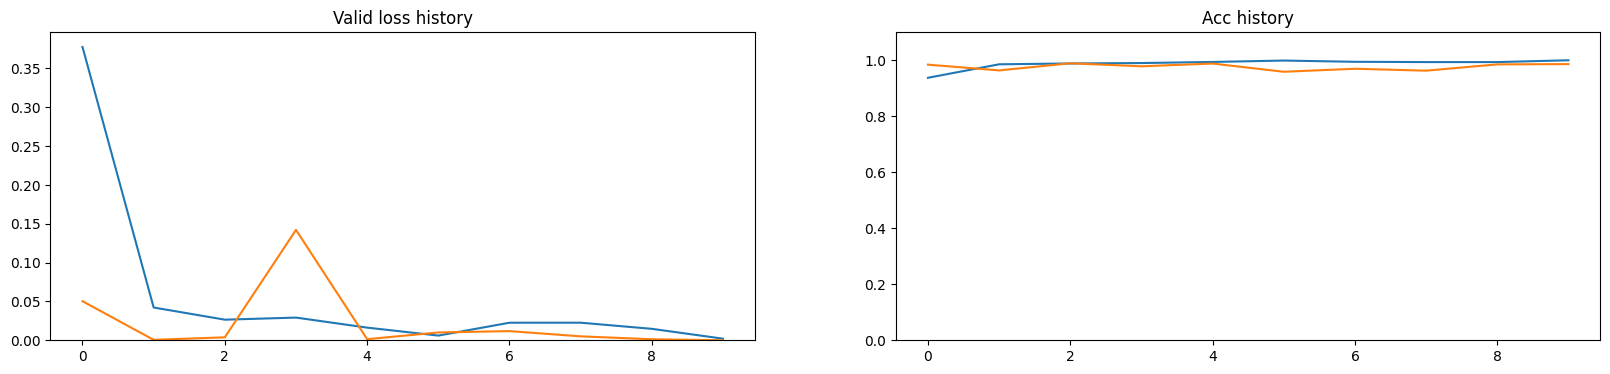

In [ ]:
train_epoch_acc, train_epoch_losses, valid_epoch_losses, valid_epoch_acc = fit(model2, 10)

9. Сравни качество двух моделей: предобученной с замененным выходным слоем и дообученной с несколькими размороженными слоями. 

In [156]:
!git clone https://github.com/vvv-knyazeva/EDUCATIONAL-WORKS.git

Cloning into 'EDUCATIONAL-WORKS'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 410.28 KiB | 6.41 MiB/s, done.


In [175]:
%cd /content/EDUCATIONAL-WORKS

/content/EDUCATIONAL-WORKS


In [158]:
!touch 08_04_task_new_file.ipynb

In [176]:
!git add 08_04_task.ipynb

In [177]:
!git commit -m "edit"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [178]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [179]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__ и распечатай результат команды `!git status` в ячейке ниже. 

In [166]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	EDUCATIONAL-WORKS/

nothing added to commit but untracked files present (use "git add" to track)


10. Сохрани модель (пример можно посмотреть [тут](../../learning/aux/model_saving.ipynb) или в [документации](https://pytorch.org/tutorials/beginner/saving_loading_models.html))

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
torch.save(model2.state_dict(), 'model2.pth')

11. Реализуй функцию, которая на вход принимает путь к файлу, а в ответ возвращает класс объекта. 

In [169]:
def get_prediction(path: str) -> str:
    resize = T.Resize((224, 224))
    img = resize(io.read_image('image2.jpg')/255)
    model.to(device)
    model.eval()
    plt.imshow(torch.permute(img, (1, 2, 0)))
    plt.title(model2(img.to(device).unsqueeze(0)).argmax().item());
    return 

In [ ]:
path = 'path/to/file.txt'
prediction = fit(path)
print(prediction)

12. Сохрани ноутбук на github

In [ ]:
# сделано

13. Реализуй telegram-бот, которому пользователь присылает картинку, а бот возвращает пользователю класс объекта, котороый изображен на картинке. 